# Artificial Neural Network

### Importing the libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [101]:
tf.__version__

'1.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [83]:
#to read excel dataset file:
!pip install xlrd #I installed it before using Anaconda "pip install xlrd" or "conda install xlrd"

In [120]:
df = pd.read_excel('Folds5x2_pp.xlsx')

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [121]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [122]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [123]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

### Splitting the dataset into the Training set and Test set

In [124]:
#There is no missing value in the dataset.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Feature scaling

In [125]:
from sklearn.preprocessing import StandardScaler #But Hadeline didn't do it! I don't know why, since he mentioned it is compulsory in ANN problems to do feature scaling!

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [126]:
from tensorflow.keras.models import Sequential

ann = Sequential()

### Adding the input layer and the first hidden layer

In [127]:
from tensorflow.keras.layers import Dense

ann.add(Dense(units = 6, activation = 'relu'))

### Adding the second hidden layer

In [128]:
ann.add(Dense(units = 6, activation = 'relu'))

### Adding the output layer

In [129]:
ann.add(Dense(units = 1)) #in the "Classification" tasks we used "Sigmoid" or "Softmax" for the activation function of the output layer. In the Regression tasks, we leave "activation" blank! So it goes to the default of "None"!

## Part 3 - Training the ANN

### Compiling the ANN

In [130]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy']) #In ANN Regression tasks (Actually in ALL Regression tasks :DD) we use "Loss = 'mean_squared_error'".
#I added "metrics = ['accuracy']" myself.

### Training the ANN model on the Training set

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [131]:
ann.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = [x_test, y_test]) #, callbacks = [early_stop]

Train on 7654 samples, validate on 1914 samples
Epoch 1/100
7654/7654 [==============================] - 1s 118us/sample - loss: 204522.2999 - acc: 0.0000e+00 - val_loss: 201231.9195 - val_acc: 0.0000e+00
Epoch 2/100
7654/7654 [==============================] - 1s 80us/sample - loss: 191954.5775 - acc: 0.0000e+00 - val_loss: 178638.1907 - val_acc: 0.0000e+00
Epoch 3/100
7654/7654 [==============================] - 1s 84us/sample - loss: 157561.6239 - acc: 0.0000e+00 - val_loss: 132507.8812 - val_acc: 0.0000e+00
Epoch 4/100
7654/7654 [==============================] - 1s 82us/sample - loss: 106086.2727 - acc: 0.0000e+00 - val_loss: 79330.1972 - val_acc: 0.0000e+00
Epoch 5/100
7654/7654 [==============================] - 1s 85us/sample - loss: 59667.1140 - acc: 0.0000e+00 - val_loss: 42471.2622 - val_acc: 0.0000e+00
Epoch 6/100
7654/7654 [==============================] - 1s 93us/sample - loss: 32704.1609 - acc: 0.0000e+00 - val_loss: 24439.6546 - val_acc: 0.0000e+00
Epoch 7/100
7654/765

Epoch 55/100
7654/7654 [==============================] - 1s 88us/sample - loss: 21.4389 - acc: 0.0000e+00 - val_loss: 19.9787 - val_acc: 0.0000e+00
Epoch 56/100
7654/7654 [==============================] - 1s 84us/sample - loss: 21.3221 - acc: 0.0000e+00 - val_loss: 20.3474 - val_acc: 0.0000e+00
Epoch 57/100
7654/7654 [==============================] - 1s 72us/sample - loss: 21.3746 - acc: 0.0000e+00 - val_loss: 20.2476 - val_acc: 0.0000e+00
Epoch 58/100
7654/7654 [==============================] - 1s 76us/sample - loss: 21.4378 - acc: 0.0000e+00 - val_loss: 19.9666 - val_acc: 0.0000e+00
Epoch 59/100
7654/7654 [==============================] - 1s 84us/sample - loss: 21.5596 - acc: 0.0000e+00 - val_loss: 19.9355 - val_acc: 0.0000e+00
Epoch 60/100
7654/7654 [==============================] - 1s 85us/sample - loss: 21.4104 - acc: 0.0000e+00 - val_loss: 20.1005 - val_acc: 0.0000e+00
Epoch 61/100
7654/7654 [==============================] - 1s 90us/sample - loss: 21.4130 - acc: 0.0000e+00

### Predicting the results of the Test set

In [132]:
y_pred = ann.predict(x_test)

In [133]:
np.set_printoptions(precision = 2)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[431.33, 431.23],
       [458.1 , 460.01],
       [462.64, 461.14],
       ...,
       [468.96, 473.26],
       [441.9 , 438.  ],
       [461.42, 463.28]])

In [134]:
metrics = pd.DataFrame(ann.history.history)

In [135]:
metrics

,loss,acc,val_loss,val_acc
0,204522.299860,0.0,201231.919491,0.0
1,191954.577537,0.0,178638.190667,0.0
2,157561.623912,0.0,132507.881237,0.0
3,106086.272722,0.0,79330.197206,0.0
4,59667.114009,0.0,42471.262196,0.0
...,...,...,...,...
95,21.308696,0.0,20.199193,0.0
96,21.419070,0.0,19.831119,0.0
97,21.473556,0.0,20.067552,0.0
98,21.394763,0.0,19.984290,0.0


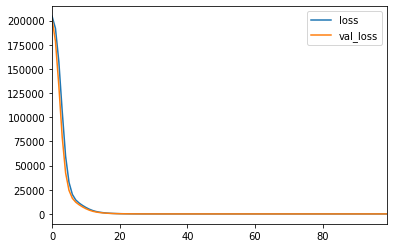

In [136]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
#So no overfitting happened too! Also by using "Early stopping" the model went until epoch "38/100"!

#Anyway, the goal in here (Regression in ANN) was to choose NOTHING for the output layer's "activation" and also to choose compile hyperparameter "loss = 'mean_squared_error'".